<a href="https://colab.research.google.com/github/kawakami18/e2021.0214/blob/main/%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 機械学習

---

##線形回帰モデル

ある入力から出力を予測することを回帰問題という。その回帰問題を解くための学習モデルが線形回帰モデル。目的は与えられたデータに適合するような直線を描く関数を見つけること。モデルに与えたデータと見つけ出された直線を描く関数の差のことを誤差と呼ぶ。（全てのデータが直線を描く関数からの誤差を求め、その誤差を2乗したものが平均二乗誤差。）その後に、学習データの平均二乗誤差を最小とするパラメータを探索するために、その勾配が0になる点を求める。（最小二乗法）
### 二次元の直線の方程式
$$
y = Ax + B
$$
### 三次元の直線の方程式
$$
Z = A·x + B·y + C
$$
### n次元空間における超平面の方程式
$$
\begin{align}
y &= a_0 + a_1·x_1 + a_2·x_2 + ··· + a_{n-1}·x_{n-1} \\
&= a_0 + \sum_{i=1}^{n-1}a_i·x_i \\
&= \sum_{i=0}^{n-1}a_i·x_i\qquad ,where\qquad x_0\equiv 1 \\
ベクトル表記に変換 \qquad
&= \vec{a}^{\mathrm{T}}·\vec{x}\qquad ,where\qquad 
    \vec{a}= \left(
    \begin{array}{c}
    a_0 \\
    a_1 \\
    \vdots \\
    a_{n-1}
    \end{array}
    \right) \qquad (n次元ベクトル)
\\
\vec{a}^{\mathrm{T}} &= (a_0 \ a_1 \dots a_{n-1})
\\
\\    
    \vec{x}&= \left(
    \begin{array}{c}
    x_0 \\
    x_1 \\
    \vdots \\
    x_{n-1}
    \end{array}
    \right) \ (n次元ベクトル)
\\
ベクトル計算 \qquad
(a_0 \ a_1 \dots a_{n-1} )
\left(
    \begin{array}{c}
    x_0 \\
    x_1 \\
    \vdots \\
    x_{n-1}
    \end{array}
    \right)   
\end{align}
$$

### 線形結合 (入力とパラメータの内積)

・入力ベクトル${X}$と未知のパラメータ${W}$の各要素を掛け算し足し合わせる。\
・入力ベクトル${X}$との線型結合に加え、切片${w{_0}}$も足し合わせる。\
・入力のベクトル${X}$が多次元でも出力は1次元(スカラ)となる。\
・慣例として予測値にはハット(^)を付ける。(正解値と異なるため)\
$$
\hat{y}=w^TX + w_0 = \sum_{j=1}^{m}w_jx_j + w_0
$$
### モデルのパラメータ
・未知であるパラメータを最小二乗法により推定する。

### 連立方程式を行列表現に変換する
連立方程式
$$
y_1 = w_0 + w_1·x_1 + \epsilon_1 \\
y_2 = w_0 + w_1·x_2 + \epsilon_2 \\
\vdots \\
y_n = w_0 + w_1·x_n + \epsilon_n \\
$$

行列表現 ($\epsilon$は無視する)
$$
\begin{pmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{pmatrix}
= \begin{pmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_n
\end{pmatrix}
\begin{pmatrix}
w_0 \\
w_1
\end{pmatrix}
$$

### numpyで回帰分析をする

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### 単回帰分析
1つの目的変数を1つの説明変数で予測する

In [ ]:
# 訓練データ生成
n_sample = 100
var = .2

def linear_func(x):
    return 2 * x + 5

def add_noise(y_true, var):
    return y_true + np.random.normal(scale=var, size=y_true.shape)

def plt_result(xs_train, ys_true, ys_train):
    plt.scatter(xs_train, ys_train, facecolor="none", edgecolor="b", s=50, label="training data")
    plt.plot(xs_train, ys_true, label="$2 x + 5$")
    plt.legend()        

xs: (100,)
ys_ture: (100,)
ys: (100,)


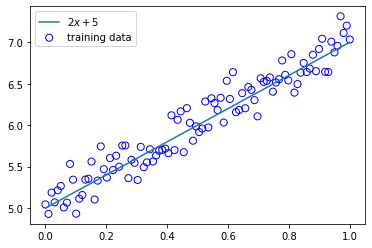

In [ ]:
# データの作成
xs = np.linspace(0, 1, n_sample)
ys_true = linear_func(xs)
ys = add_noise(ys_true, var)

print("xs: {}".format(xs.shape))
print("ys_ture: {}".format(ys_true.shape))
print("ys: {}".format(ys.shape))

# 結果の描画
plt_result(xs, ys_true, ys)

In [ ]:
# numpyで線形回帰実装
def train(xs, ys):
    cov = np.cov(xs, ys, ddof=0)
    a = cov[0, 1] / cov[0, 0]
    b = np.mean(ys) - a * np.mean(xs)
    return cov, a, b

cov, a, b = train(xs, ys)
print("cov: {}".format(cov))
print("coef: {}".format(a))
print("intercept: {}".format(b))


cov: [[0.08501684 0.17045366]
 [0.17045366 0.36807449]]
coef: 2.0049401372562645
intercept: 5.029069157907956


In [ ]:
# skl実装の回帰
from sklearn.linear_model import LinearRegression
model = LinearRegression()
reg = model.fit(xs.reshape(-1, 1), ys.reshape(-1, 1))

print("coef_: {}".format(reg.coef_))
print("intercept_: {}".format(reg.intercept_))

coef_: [[2.00494014]]
intercept_: [5.02906916]


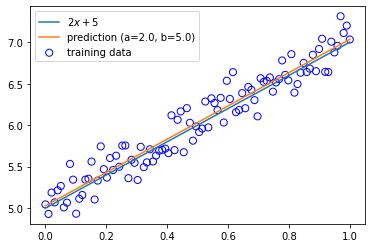

In [ ]:
# 予測
xs_new = np.linspace(0, 1, n_sample)
ys_pred = a * xs_new + b

plt.scatter(xs, ys, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(xs_new, ys_ture, label="$2 x + 5$")
plt.plot(xs_new, ys_pred, label="prediction (a={:.2}, b={:.2})".format(a, b))
plt.legend()
plt.show()

### 多項式回帰

In [ ]:
# 訓練データ生成
n_sample = 10
var = .25

def sin_func(x):
    return np.sin(2 * np.pi * x)

def add_noise(y_true, var):
    return y_true + np.random.normal(scale=var, size=y_true.shape)

def plt_result(xs, ys_true, ys):
    plt.scatter(xs, ys, facecolor="none", edgecolor="b", s=50, label="training data")
    plt.plot(xs, ys_true, label="$\sin(2\pi x)$")
    plt.legend()        

xs: (10,)
ys_true: (10,)
ys: (10,)


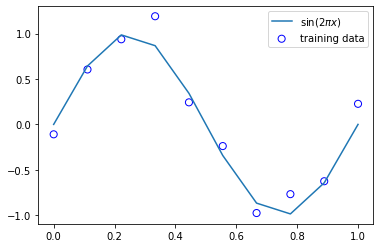

In [ ]:
# データの生成
xs = np.linspace(0, 1, n_sample)
ys_true = sin_func(xs)
ys = add_noise(ys_true, var)

print("xs: {}".format(xs.shape))
print("ys_true: {}".format(ys_true.shape))
print("ys: {}".format(ys.shape))

# 結果の描画
plt_result(xs, ys_true, ys)

In [ ]:
# 学習
def polynomial_features(xs, degree=3):
    """多項式特徴ベクトルに変換
    X = [[1, x1, x1^2, x1^3],
         [1, x2, x2^2, x2^3],
         ...
         [1, xn, xn^2, xn^3]]"""
    X = np.ones((len(xs), degree+1))
    X_t = X.T #(100, 4)
    for i in range(1, degree+1):
        X_t[i] = X_t[i-1] * xs
    return X_t.T             

In [ ]:
Phi = polynomial_features(xs)
Phi_inv = np.dot(np.linalg.inv(np.dot(Phi.T, Phi)), Phi.T)
w = np.dot(Phi_inv, ys)

In [ ]:
# 予測
Phi_test = polynomial_features(xs)
ys_pred = np.dot(Phi_test, w)

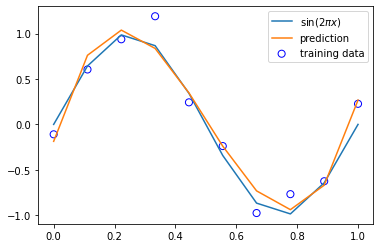

In [ ]:
plt.scatter(xs, ys, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(xs, ys_true, label="$\sin(2\pi x)$")
plt.plot(xs, ys_pred, label="prediction")
# for i in range(0, 4):
#     plt.plot(xs, Phi[:, i], label="basis")
plt.legend()
plt.show()

### 重回帰分析

In [ ]:
# 訓練データ生成(3次元入力)
np.random.random((10, 3))

array([[0.69750615, 0.4135508 , 0.96926794],
       [0.78918098, 0.60514458, 0.75262287],
       [0.04884431, 0.15822534, 0.04580307],
       [0.49886699, 0.06110619, 0.55227501],
       [0.30728799, 0.6674662 , 0.91084836],
       [0.39144236, 0.58792541, 0.40136614],
       [0.19165313, 0.79690543, 0.6070552 ],
       [0.42427567, 0.24210207, 0.12919243],
       [0.88528136, 0.33768896, 0.65687092],
       [0.01297247, 0.99232025, 0.1407005 ]])

In [ ]:
n_sample = 100
var = .2

def mul_linear_func(x):
    ww = [1., 0.5, 2., 1.]
    return ww[0] + ww[1] * x[:, 0] + ww[2] * x[:, 1] + ww[3] * x[:, 2]

def add_noise(y_true, var):
    return y_true + np.random.normal(scale=var, size=y_true.shape)

def plt_result(xs_train, ys_true, ys_train):
    plt.scatter(xs_train, ys_train, facecolor="none", edgecolor="b", s=50, label="training data")
    plt.plot(xs_train, ys_true, label="$2 x + 5$")
    plt.legend()        

In [ ]:
x_dim = 3

X = np.random.random((n_sample, x_dim))
ys_true = mul_linear_func(X)
ys = add_noise(ys_true, var)

In [ ]:
# 学習
def add_one(x):
    return np.concatenate([np.ones(len(x))[:, None], x], axis=1)
    
    X_train = add_one(X)
    # pinv = np.dot(np.linalg.inv(np.dot(X_train.T, X_train)), X_train.T)
    # w = np.dot(pinv, y_train)

In [ ]:
# 予測
# パラメータ推定結果
ww = [1., 0.5, 2., 1.]

In [ ]:
for i in range(len(w)):
    print("w{0}_true: {1:>5.2}    w{0}_estimated: {2:>5.2}".format(i, ww[i], w[i]))

w0_true:   1.0    w0_estimated: -0.19
w1_true:   0.5    w1_estimated: 1.2e+01
w2_true:   2.0    w2_estimated: -3.5e+01
w3_true:   1.0    w3_estimated: 2.3e+01


### 問４　線形回帰の説明

線形回帰で残差平方和が最小となる係数の推定値を求めるために最小二乗法を使う。外れ値があると回帰線が外れ値の方に寄ってしまう。

説明変数間の相関があることを多重共線性という。多重共線性が現れると回帰モデルで推定された回帰係数のばらつきが大きくなり、予測が不確かになり易い。

モデルの表現力が高すぎると、データの些細な挙動までモデルが学習してしまう。要するに過学習を起こす。

訓練データが少ないほど、訓練誤差にフィットし過ぎてしまい、未知のデータに対しては汎化誤差が大きくなってしまう。


---

## 非線形回帰モデル

単回帰や重回帰の特徴量$x$が非線形の関数を扱うモデルを非線形回帰モデルという。

$
単回帰　y = w_0 + w_1・x \\
重回帰　y = w_0 + w_1・x_1 + w_2・x_2 + ・・・ + w_m・x_m \\
非線形な回帰　y = w_0 + w_1・x + w_2 ・x^2 + w_3・x^3　\\
　　　　　　　y = w_0 + w_1・\sin x + w_2・\cos x + w_3・\log x  \\
Idea:xの代わりに\phi(x)を用いる。(xの関数は任意) \\
xが\phi(x)に代わるだけ。ただしパラメータwに関しては線形のまま。\\
重みwが線形であることをlinear-in-parameterとよぶ。\\
$
$$equation　　　　y_i = w_0 + \sum_{j=1}^m w_j\phi  j(x_i) + \varepsilon_i$$
$
\phi  j(x_i)を基底関数という。基底関数は関数を表現するベースとして使う。
よく使われる基底関数に多項式関数、ガウス型基底関数、スプライン/Bスプライン関数などがある。\\
・多項式関数\phi_i = x \\
\begin{align}
\hat{y}_i &= w_0 + w_1 ・\phi_1(x_i) + w_2・\phi_2(x_i) + ・・・w_m・\phi_m(x_i) \\
&= w_0 + w_1・x_i + w_2・x_i^2 + ・・・+ w_m・x_i^m
\end{align}\\
求めるべきwについては線形である。


$

### 非線形回帰モデル実装演習

In [ ]:
# ライブラリインポート
import numpy as np # 配列計算用ライブラリ
import pandas as pd # データ計算用ライブラリ

from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_style("ticks")


In [ ]:
# データ読込み
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df["MEDV"] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


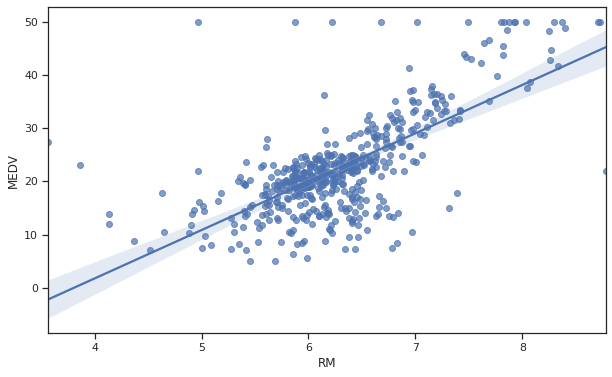

In [ ]:
# 散布図
plt.figure(figsize=(10, 6))
sns.regplot(x=df.RM, y=df.MEDV, scatter_kws={"alpha": 0.7})
plt.show()

In [ ]:
# データ準備
x = df["RM"]
X = np.array(x).reshape(-1, 1)
y = df["MEDV"]
print("-"*10 + "特徴量とターゲットに分割" + "-"*10)
print("X:", X.shape)
print("y:", y.shape)
# 訓練用データとテスト用データに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

----------特徴量とターゲットに分割----------
X: (506, 1)
y: (506,)


In [ ]:
# 非線形モデルの作成
pf = PolynomialFeatures(degree=2, include_bias=False)# 二次元の特徴量を作成
X_train_2 = pf.fit_transform(X_train)
X_test_2 = pf.fit_transform(X_test)
print("元のRM:")
print(X_train[:5])
print("二乗したRM: ")
print(X_train_2[:5])

元のRM:
[[6.951]
 [5.961]
 [6.897]
 [6.012]
 [5.304]]
二乗したRM: 
[[ 6.951    48.316401]
 [ 5.961    35.533521]
 [ 6.897    47.568609]
 [ 6.012    36.144144]
 [ 5.304    28.132416]]


In [ ]:
# モデル作成
lm = LinearRegression()
lm.fit(X_train_2, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# パラメタ表示
print("バイアス", lm.intercept_)
print("重み", lm.coef_)

バイアス 68.20229885775143
重み [-23.56509374   2.56037958]


In [ ]:
# 非線形回帰モデル精度表示
print("Train Score : {:.2f}" .format(lm.score(X_train_2, y_train)))
print("Test Score : {:.2f}" .format(lm.score(X_test_2, y_test)))

Train Score : 0.56
Test Score : 0.51


In [ ]:
# モデル作成
tmp = LinearRegression()
tmp.fit(X_train, y_train)
y_pred_tmp = tmp.predict(X_test)

In [ ]:
# 単回帰モデル精度表示
print("Train Score : {:.2f}" .format(tmp.score(X_train, y_train)))
print("Test Score : {:.2f}" .format(tmp.score(X_test, y_test)))


Train Score : 0.50
Test Score : 0.42


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


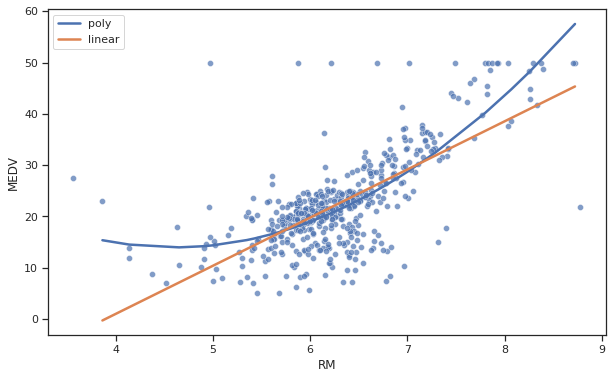

In [ ]:
# 学習結果
X_test_a = np.array([np.sort(X_test[:, 0])]).reshape(len(X_test), 1)
X_test_2 = pf.fit_transform(X_test_a)
y_pred = lm.predict(X_test_2)
plt.figure(figsize=(10, 6))
sns.scatterplot(X.reshape(len(X), ), y, alpha=0.7)
sns.lineplot(x=X_test_a.reshape(len(X_test_a), ), y=y_pred, linewidth=2.5, label='poly')
sns.lineplot(x=X_test.reshape(len(X_test), ), y=y_pred_tmp, linewidth=2.5, label='linear')
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.show()

In [ ]:
print("バイアス", lm.intercept_)
print("重み", lm.coef_)

バイアス 68.20229885775143
重み [-23.56509374   2.56037958]


多項式関数の特徴\
・離れた点の推定に影響を受けやすい。\
・モデルの説明変数を増やすほどモデルの柔軟性は向上する。\
・説明変数を増やしすぎると過学習をするので適切な説明変数を使うことと最小限の説明変数を選択することが必要。（変数選択、オッカムの剃刀）
・データ量を増やす、正則化するなどで過学習を抑える。\
\
ガウス型基底関数\
・データ点が近いほど情報の影響を強く受ける。離れるにしたがい情報の影響は弱まる。\
・データが十分に存在する場所は分散が小さくなり、データが少ない場所では分散が大きくなる。\
・線形回帰モデルを無限次元に拡張できる。\
・計算量が膨大になるのでカーネル行列の計算量を減らす工夫が必要。



---


## ロジスティック回帰モデル

ロジスティック回帰モデルは主に二値分類に使われるアルゴリズム。\
ラベルの値が二種類しかないような教師あり訓練データに適用される。\
\
目的変数 $$ x = (x_1, x_2, \cdots ,x_m)^T \in \mathbb{R}^m $$
\
目的変数 $$ y \in \{0, 1\} $$
\
教師データ $$ \{(x_1, y_1);i=1,\cdots,n\}$$
\
ラベル$y$が1になる確率 $$ P(Y = 1|X = x) $$
\
ラベル$y$が0になる確率　$$ P(Y = 0|X = x) $$
\
ロジスティック回帰の式 $$ P(Y = 1|X = x) = \sigma(w_0 + \sum_{j=1}^dx_jw_j)=\sigma(w^T\tilde{x}^T) $$
\
シグモイド関数 $$ \sigma(\varepsilon) = \frac{1}{1+e^{-\varepsilon}} $$
\
シグモイド関数を作用させることで入力された$x$が実数全体の値をとるのに対して出力の$y$では0から1の値につぶされる。\
\
シグモイド関数の性質\
・シグモイド関数の微分は、シグモイド関数自身で表現することが可能
・尤度関数の微分を行う際にこの事実を利用すると計算が容易になる。\
\
シグモイド関数の微分\
$$ a(z) = \frac{1}{1 + exp(-z)}=\{1+exp(-z)\}^{-1} $$
\
$$ \Longrightarrow \frac{d\sigma(z)}{dz} = -1\{1+exp(-z)\}^{-2}×exp(-z)×(-1) $$
\
$$ \Longrightarrow = \frac{1}{1+exp(-z)}×\frac{exp(-z)}{1+exp(-z)}$$
\
$$ \Longrightarrow = \sigma(z)×(1-\sigma(z)) $$
\
＊シグモイド関数の微分はシグモイド関数で表せる






### numpyでロジスティック回帰の実装


In [ ]:
# ロジスティック回帰の実装
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
n_sample = 100
harf_n_sample = 50
var = .2

def gen_data(n_sample, harf_n_sample):
    x0 = np.random.normal(size=n_sample).reshape(-1, 2) - 1.
    x1 = np.random.normal(size=n_sample).reshape(-1, 2) + 1.
    x_train = np.concatenate([x0, x1])
    y_train = np.concatenate([np.zeros(harf_n_sample), np.ones(harf_n_sample)]).astype(np.int)
    return x_train, y_train

def plt_data(x_train, y_train):
    plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, facecolor="none", edgecolor="b", s=50, label="training data")
    plt.legend()    


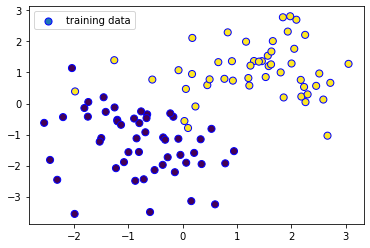

In [ ]:
# データ作成
x_train, y_train = gen_data(n_sample, harf_n_sample)
# データ表示
plt_data(x_train, y_train)

In [ ]:
def add_one(x):
    return np.concatenate([np.ones(len(x))[:, None], x], axis=1)


In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sgd(X_train, max_iter, eta):
    w = np.zeros(X_train.shape[1])
    for _ in range(max_iter):
        w_prev = np.copy(w)
        sigma = sigmoid(np.dot(X_train, w))
        grad = np.dot(X_train.T, (sigma - y_train))
        w -= eta * grad
        if np.allclose(w, w_prev):
            return w
    return w

X_train = add_one(x_train)
max_iter=100
eta = 0.01
w = sgd(X_train, max_iter, eta)                

In [ ]:
xx0, xx1 = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
xx = np.array([xx0, xx1]).reshape(2, -1).T

In [ ]:
X_test = add_one(xx)
proba = sigmoid(np.dot(X_test, w))
y_pred = (proba > 0.5).astype(np.int)

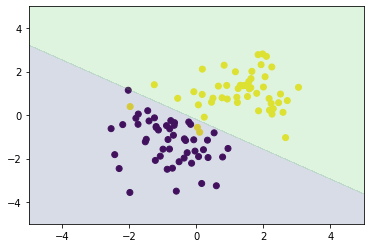

In [ ]:
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.contourf(xx0, xx1, proba.reshape(100, 100), alpha=0.2, levels=np.linspace(0, 1, 3))

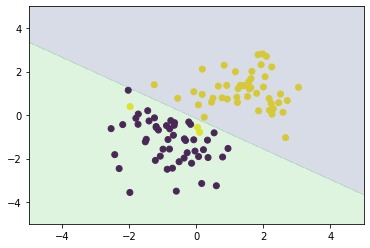

In [ ]:
# numpy実装
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(fit_intercept=True)
model.fit(x_train, y_train)
proba = model.predict_proba(xx)
y_pred = (proba > 0.5).astype(np.int)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.contourf(xx0, xx1, proba[:, 0].reshape(100, 100), alpha=0.2, levels=np.linspace(0, 1, 3))

###演習問題

ロジスティック回帰は（教師あり学習の分類）の1つであり、2値分類では、入力が一方のクラスに属する確率を出力するように学習する。ロジスティック回帰では学習の際、（尤度関数）の最大化を行う。


---


##主成分分析

主成分分析は2次元のデータを1次元のデータに圧縮できる。\
（多変量データの持つ構造をより小個数の指標に圧縮する。）\
\
学習データ\
$$ x_i = (x_{i1}, x_[i2], \cdots, x_{im} )\in \mathbb{R}^m $$
\
平均（ベクトル）\
$$ \bar{x}= \frac{1}{n}\sum_{i=1}^n x_i$$
\
データ行列\
$$ \bar{X}=(x_1-\bar{x},\cdots,x_n-\bar{x})^T \in \mathbb{R}^{n×m} $$
\
共分散行列\
$$ \sum=Var(\bar{X})=\frac{1}{n}\bar{X}^T\bar{X} $$
\
線形変換後のベクトル　＊jは射影軸のインデックス\
$$ s_j =(s_{1j},\cdots,s_{nj})^T=\bar{X}a_j　　a_j\in\mathbb{R}^m $$
\
係数ベクトルが変われば線形変換後の値が変化する。\
・情報の量を分散の大きさと捉える。\
・線形変換後の変数の分散が最大となる射影軸を探索する。

###主成分分析実装演習


In [ ]:
# numpyを使って主成分分析
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 訓練データ生成
n_sample = 100

def gen_data(n_sample):
    mean = [0, 0]
    cov = [[2, 0.7], [0.7, 1]]
    return np.random.multivariate_normal(mean, cov, n_sample)

def plt_data(X):
    plt.scatter(X[:, 0], X[:, 1])
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)    

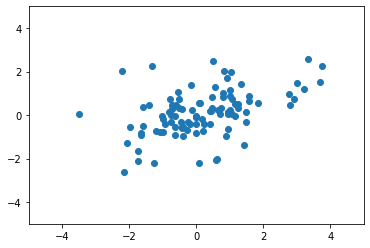

In [ ]:
X = gen_data(n_sample)
plt_data(X)

In [ ]:
#学習
n_components=2

def get_moments(X):
    mean = X.mean(axis=0)
    stan_cov = np.dot((X - mean).T, X - mean) / (len(X) - 1)
    return mean, stan_cov

def get_components(eigenvectors, n_components):
#     W = eigenvectors[:, -n_components:]
#     return W.T[::-1]
    W = eigenvectors[:, ::-1][:, :n_components] 
    return W.T

def plt_result(X, first, second):
    plt.scatter(X[:, 0], X[:, 1])
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    # 第一主成分
    plt.quiver(0, 0, first[0], first[1], width=0.01, scale=6, color='red')
    # 第二主成分
    plt.quiver(0, 0, second[0], second[1], width=0.01, scale=6, color='green')           

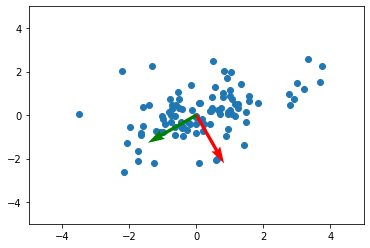

In [ ]:
# 分散共分散行列を標準化
meen, stan_cov = get_moments(X)
# 固有値と固有ベクトルを計算
eigenvalues, eigenvectors = np.linalg.eigh(stan_cov)
components = get_components(eigenvectors, n_components)

plt_result(X, eigenvectors[0, :], eigenvectors[1, :])

In [ ]:
# 変換（射影）
def transform_by_pca(X, pca):
    mean = X.mean(axis=0)
    return np.dot(X-mean, components)

(-5.0, 5.0)

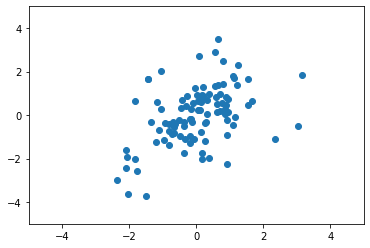

In [ ]:
Z = transform_by_pca(X, components.T)
plt.scatter(Z[:, 0], Z[:, 1])
plt.xlim(-5, 5)
plt.ylim(-5, 5)

In [ ]:
# 逆変換
mean = X.mean(axis=0)
X_ = np.dot(Z, components.T) + mean

(-5.0, 5.0)

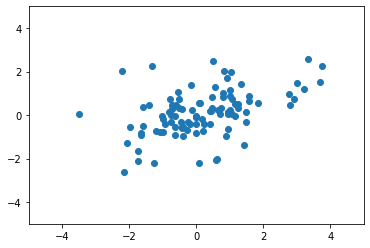

In [ ]:
plt.scatter(X_[:, 0], X_[:, 1])
plt.xlim(-5, 5)
plt.ylim(-5, 5)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
print('components: {}'.format(pca.components_))
print('mean: {}'.format(pca.mean_))
print('covariance: {}'.format(pca.get_covariance()))

components: [[ 0.86725048  0.49787208]
 [-0.49787208  0.86725048]]
mean: [0.17157728 0.10762616]
covariance: [[1.85813735 0.65383453]
 [0.65383453 1.09456768]]


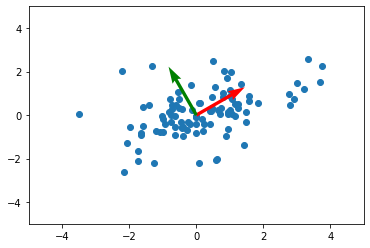

In [ ]:
plt_result(X, pca.components_[0, :], pca.components_[1, :])

components: [[ 0.86725048  0.49787208]
 [-0.49787208  0.86725048]]
mean: [0.17157728 0.10762616]
covariance: [[1.85813735 0.65383453]
 [0.65383453 1.09456768]]


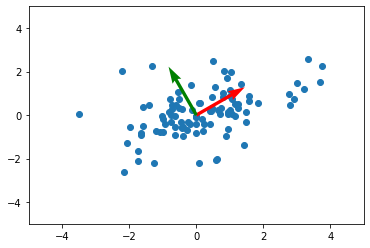

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
plt_result(X, pca.components_[0, :], pca.components_[1, :])
print('components: {}'.format(pca.components_))
print('mean: {}'.format(pca.mean_))
print('covariance: {}'.format(pca.get_covariance()))

###演習問題
主成分分析とは、（次元削減）を行うための手法。主成分分析は（対共分散行列）の（固有ベクトル）を基に新たな座標軸を複数作成し、新たな座標軸から構成される低次元空間へデータを写像する。このとき、（固有値）の大きい固有ベクトルのほうから第一主成分となる。また、各主成分の固有値を固有値の総和で割った値が（寄与率）と呼ぶ。寄与率は各主成分がどの程度、元のデータを説明できるかを表す指標になる。

---

##アルゴリズム

機械学習のアルゴリズムにk近傍法(KNN)やｋ-平均法（k-meas)などがある。

データ間の類似性を計算し、データのクラスタ（グループ）に分けることを行います。

・k近傍法の手順

kの値と距離指標を選択する。 

分類したいサンプルからｋ個の最近傍のデータ点を見つけ出す。

多数決によりクラスラベルを割り当てる。


・k-means法の手順

データの集まりにランダムにラベルを割り当てる。

ラベルと各データの平均が小さくなるようにラベルを移動し更新させる。

###numpyでKNN実装

In [ ]:
#KNN
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
#訓練データ生成
def gen_data():
    x0 = np.random.normal(size=50).reshape(-1, 2) - 1.
    x1 = np.random.normal(size=50).reshape(-1, 2) + 1.
    x_train = np.concatenate([x0, x1])
    y_train = np.concatenate([np.zeros(25), np.ones(25)]).astype(np.int)
    return x_train, y_train



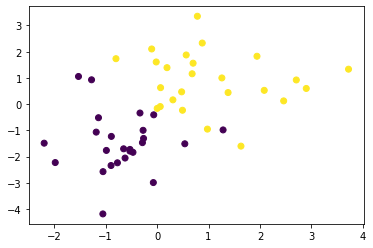

In [ ]:
X_train, ys_train = gen_data()
plt.scatter(X_train[:, 0], X_train[:, 1], c=ys_train)

In [ ]:
#予測
def distance(x1, x2):
    return np.sum((x1 - x2)**2, axis=1)

def knc_predict(n_neighbors, x_train, y_train, X_test):
    y_pred = np.empty(len(X_test), dtype=y_train.dtype)
    for i, x in enumerate(X_test):
        distances = distance(x, X_train) 
        nearest_index = distances.argsort()[:n_neighbors]
        mode, _ = stats.mode(y_train[nearest_index])
        y_pred[i] = mode
    return y_pred

def plt_resut(x_train, y_train, y_pred):
    xx0, xx1 = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
    xx = np.array([xx0, xx1]).reshape(2, -1).T
    plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
    plt.contourf(xx0, xx1, y_pred.reshape(100, 100).astype(dtype=np.float), alpha=0.2, levels=np.linspace(0, 1, 3))           

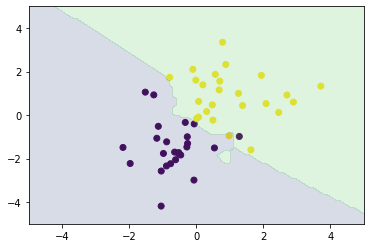

In [ ]:
n_neighbors = 3

xx0, xx1 = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
X_test = np.array([xx0, xx1]).reshape(2, -1).T

y_pred = knc_predict(n_neighbors, X_train, ys_train, X_test)
plt_resut(X_train, ys_train, y_pred)

In [ ]:
#numpy実装
xx0, xx1 = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
xx = np.array([xx0, xx1]).reshape(2, -1).T

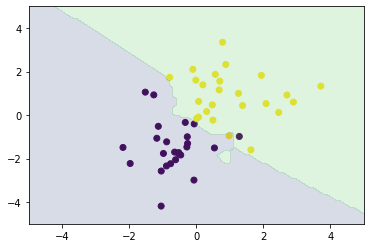

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors).fit(X_train, ys_train)
plt_resut(X_train, ys_train, knc.predict(xx))

###numpyでk-means実装

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#データ生成
def gen_data():
    x1 = np.random.normal(size=(100, 2)) + np.array([-5, -5])
    x2 = np.random.normal(size=(100, 2)) + np.array([5, -5])
    x3 = np.random.normal(size=(100, 2)) + np.array([0, 5])
    return np.vstack((x1, x2, x3))

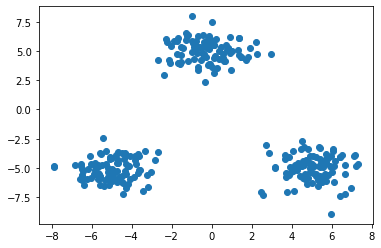

In [ ]:
#データ作成
X_train = gen_data()
#データ描画
plt.scatter(X_train[:, 0], X_train[:, 1])

In [ ]:
def distance(x1, x2):
    return np.sum((x1 - x2)**2, axis=1)

n_clusters = 3
iter_max =100

#各クラスタの中心をランダム初期化
centers = X_train[np.random.choice(len(X_train), n_clusters, replace=False)]

for _ in range(iter_max):
    prev_centers = np.copy(centers)
    D = np.zeros((len(X_train), n_clusters))
    #各データ点に対して、各クラスタの中心との距離を計算
    for i, x in enumerate(X_train):
        D[i] = distance(x, centers)
    #各データ点に最も距離が近いクラスタを割り当てる
    cluster_index = np.argmin(D, axis=1)
    #各クラスタの中心を計算
    for k in range(n_clusters):
        index_k = cluster_index == k
        centers[k] = np.mean(X_train[index_k], axis=0)
    #収束判定
    if np.allclose(prev_centers, centers):
        break        
    

In [ ]:
#クラスタリングの結果
def plt_result(X_train, centers, xx):
    #データを可視化
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred, cmap='spring')
    #中心を可視化
    plt.scatter(X_train[:, 0], X_train[:, 1], s=200, marker='*', lw=2, c='red', edgecolor='white')
    #領域の可視化
    pred = np.empty(len(xx), dtype=int)
    for i, x in enumerate(xx):
        d = distance(x, centers)
        pred[i] = np.argmin(d)
    plt.contourf(xx0, xx1, pred.reshape(100, 100), alpha=0.2, cmap='spring')    

In [ ]:
y_pred = np.empty(len(X_train), dtype=int)
for i, x in enumerate(x_train):
    d = distance(x, centers)
    y_pred[i] = np.argmin(d)

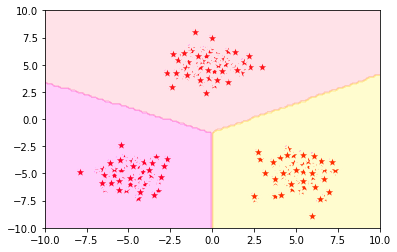

In [ ]:
xx0, xx1 = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
xx = np.array([xx0, xx1]).reshape(2, -1).T

plt_result(X_train, centers, xx)

###演習問題
教師なし学習とは、教師データを用いずに入力データ間の距離や類似度、統計的な性質に基づいてデータの構造を獲得するアルゴリズムを指す。教師なし学習の代表的なタスクとして、入力データの類似度を基にグループ分けを行う（クラスタリング）がある。クラスタリングの代表的な手法としてグループを代表とするベクトルとの類似度に基づくグループ割当てと、新たに割り当てられたグループに属するデータから代表ベクトルの更新を繰り返す（k-means）がある。

---

##サポートベクターマシーン

サポートベクタマシーンSVMは分類や回帰に使用できるアルゴリズム。外れ値の検出にも使える。直線の決定境界線を空間に引く際、その境界線と最も近い各クラスのデータ間の距離が最大になるように行う。

超平面に引く分類直線の式

$$  y = w_0 + \sum_{i=1}^n w_ix_1 = w_0 + w^T x $$



###numpyでsvm実装

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#訓練データ生成
def gen_data():
    x0 = np.random.normal(size=50).reshape(-1, 2) - 2.
    x1 = np.random.normal(size=50).reshape(-1, 2) + 2.
    X_train = np.concatenate([x0, x1])
    ys_train = np.concatenate([np.zeros(25), np.ones(25)]).astype(np.int)
    return X_train, ys_train

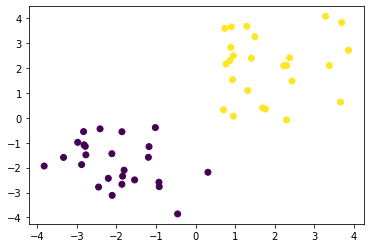

In [ ]:
X_train, ys_train = gen_data()
plt.scatter(X_train[:, 0], X_train[:, 1], c=ys_train)

In [ ]:
#学習
t = np.where(ys_train == 1.0, 1.0, -1.0)

n_samples = len(X_train)
#線形カーネル
K = X_train.dot(X_train.T)

eta1 = 0.01
eta2 = 0.001
n_iter = 500

H = np.outer(t, t) * K

a = np.ones(n_samples)
for _ in range(n_iter):
    grad = 1 - H.dot(a)
    a += eta1 * grad
    a -= eta2 * a.dot(t) * t
    a = np.where(a > 0, a, 0)


In [ ]:
#予測
index =a > 1e-6
support_vectors = X_train[index]
support_vector_t = t[index]
support_vector_a = a[index]

term2 = K[index][:, index].dot(support_vector_a * support_vector_t)
b = (support_vector_t - term2).mean()

In [ ]:
xx0, xx1 = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
xx = np.array([xx0, xx1]).reshape(2, -1).T

X_test = xx
y_project = np.ones(len(X_test)) * b
for i in range(len(X_test)):
    for a, sv_t, sv in zip(support_vector_a, support_vector_t, support_vectors):
        y_project[i] += a * sv_t * sv.dot(X_test[i])
y_pred = np.sign(y_project)        

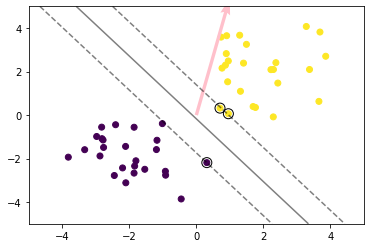

In [ ]:
#訓練データを可視化
plt.scatter(X_train[:, 0], X_train[:, 1], c=ys_train)
#サポートベクトルを可視化           
plt.scatter(support_vectors[:, 0],support_vectors[:, 1],
            s=100, facecolors='none', edgecolor='k')
#領域を可視化
#plt.contourf(xx0, xx1, y_pred.reshape(100, 100), alpha=0.2, levels=np.linspace(0, 1, 3))
#マージンと決定境界を可視化
plt.contour(xx0, xx1, y_project.reshape(100, 100), colors='k',
            levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.quiver(0, 0, 0.1, 0.35, width=0.01, scale=1, color='pink')

###参考図書から

分離不可能な場合

サポートベクタマシンでは超平面により分割の手法を学んできたが、実際問題、データ同士が重なり合ってしまい、完全に分離は不可能である。そのためにある程度の誤分類は許容しなければならない。と参考図書には記されている。しかし、線形回帰直線を学んだ後に、非線形回帰と直線を学んだのだから、サポートベクタマシンでも曲線のようなもので分類するようなものがあるのではないかと誰もが考えるだろう。それと、カーネル法という次元空間の分離を用いれば例え2次元上では入り組んだデータでも、分離できる確率も増える。